In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,hamming_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\monish\Downloads\Malignant Comments Classifier Project\train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df.shape

(159571, 8)

In [4]:
df_normal=df[(df['abuse']==0) & (df['threat']==0) & (df['rude']==0) & (df['loathe']==0) & (df['malignant']==0) & (df['highly_malignant']==0)]
df_normal

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for i in df_normal1000['comment_text']:
    print(i)
    print(sia.polarity_scores(i))

In [5]:
!pip install wordcloud

In [6]:
from wordcloud import STOPWORDS,WordCloud

In [7]:
import string

In [8]:
import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop = stopwords.words('english')
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
dfcopy=df['comment_text'].iloc[:100]
dfcopy

0     Explanation\nWhy the edits made under my usern...
1     D'aww! He matches this background colour I'm s...
2     Hey man, I'm really not trying to edit war. It...
3     "\nMore\nI can't make any real suggestions on ...
4     You, sir, are my hero. Any chance you remember...
                            ...                        
95    "\n\nThanks. I can see that violating clearly ...
96    "\nHi\nThanks for our kind words. See you arou...
97    Collusion in poker \n\nThis is regarded as mos...
98    Thanks much - however, if it's been resolved, ...
99    You can do all you're doing right now but if y...
Name: comment_text, Length: 100, dtype: object

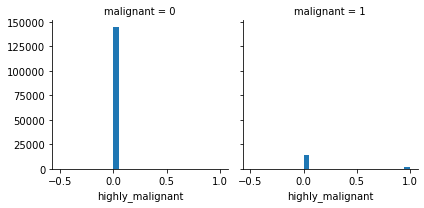

In [71]:
a= sns.FacetGrid(df, col='malignant')
a.map(plt.hist, 'highly_malignant', bins=20)

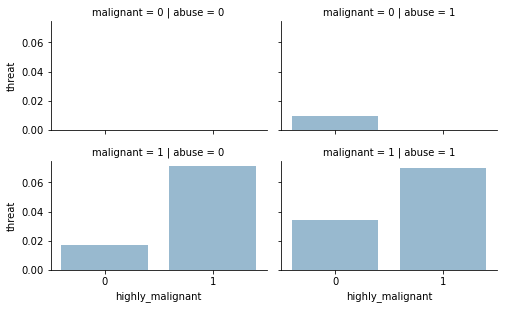

In [72]:
grid = sns.FacetGrid(df, row='malignant', col='abuse', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'highly_malignant', 'threat', alpha=.5, ci=None)
grid.add_legend()

<AxesSubplot:>

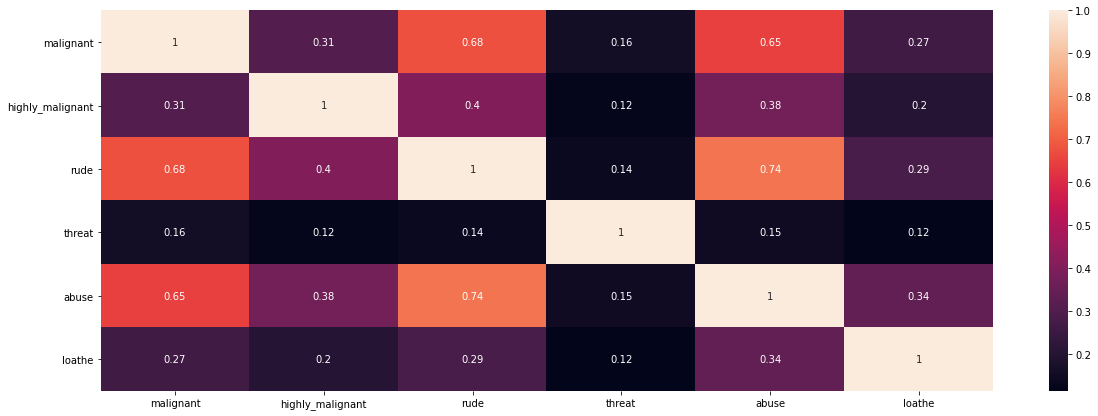

In [73]:
## we will correlate the data and visualize through heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [74]:
df['length'] = df['comment_text'].str.len()
df.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cant make any real suggestions on impr...,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...,67


malignant


0    144277
1     15294
Name: malignant, dtype: int64


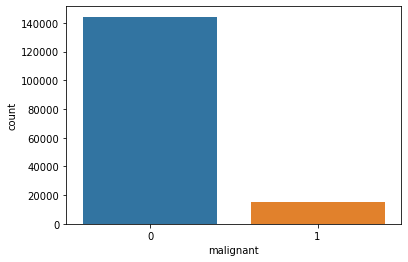

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


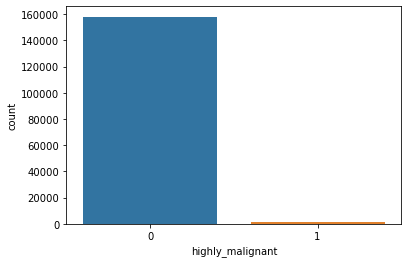

loathe


0    158166
1      1405
Name: loathe, dtype: int64


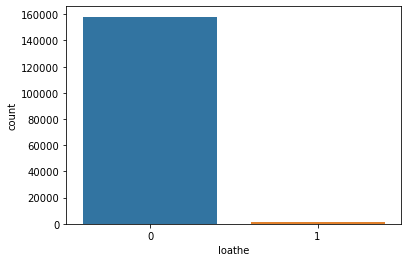

rude


0    151122
1      8449
Name: rude, dtype: int64


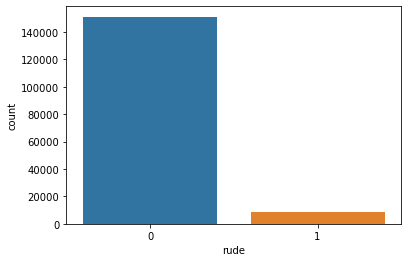

abuse


0    151694
1      7877
Name: abuse, dtype: int64


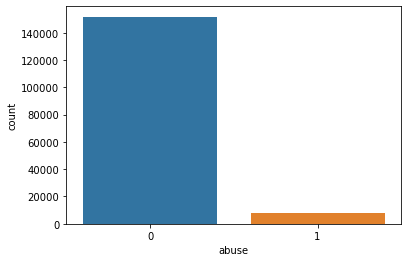

threat


0    159093
1       478
Name: threat, dtype: int64


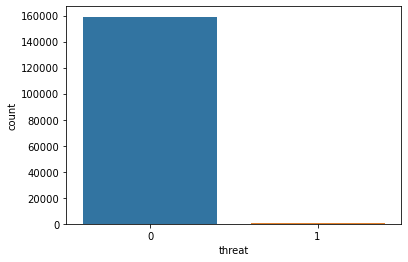

In [75]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [10]:
import sys
print(sys.getrecursionlimit())

3000


In [11]:
sys.setrecursionlimit(200000)

In [13]:
cleaned_dataset=[]
import re
for i in df['comment_text']:
    cleaned_text=i.split()
    cleaned_text=[i.lower() for i in cleaned_text]
    cleaned_text=[re.sub(r'[\n]','',i) for i in cleaned_text]
    cleaned_text=[re.sub(r'[^a-zA-Z]','',i) for i in cleaned_text]
    cleaned_text=[j for j in cleaned_text if j is not stopwords.words('english')]
    #cleaned_text=[ps.stem(k) for k in cleaned_text]
    cleaned_text=(' ').join(cleaned_text)
    cleaned_dataset.append(cleaned_text)

In [14]:
len(cleaned_dataset)

159571

In [16]:
df['cleaned_text']=cleaned_dataset

In [17]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cant make any real suggestions on impr...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [18]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [20]:
x_dfnew=vect.fit_transform(df['cleaned_text'])

In [30]:
y=df.iloc[:,2:8]
y.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_dfnew,y,random_state=48,test_size=0.2)

In [32]:
from sklearn.multioutput import MultiOutputClassifier

In [33]:
RF=RandomForestClassifier(random_state=1)
multi_target_forest=MultiOutputClassifier(RF)

In [35]:
multi_target_forest.fit(train_x,train_y)
pred=multi_target_forest.predict(test_x)

In [43]:
from sklearn.metrics import accuracy_score,hamming_loss
print(accuracy_score(pred,test_y))
print(hamming_loss(pred,test_y))

0.9084443051856493
0.02547391508694971


In [44]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
pred=OneVsRestClassifier(LinearSVC(random_state=0)).fit(train_x,train_y).predict(test_x)

In [45]:
classifier=OneVsRestClassifier(LinearSVC(random_state=0))
classifier.fit(train_x,train_y)
classifier.predict(test_x)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [46]:
print(accuracy_score(pred,test_y))
print(hamming_loss(pred,test_y))

0.9205075983080057
0.018162828346127737


In [47]:
dftest=pd.read_csv(r'C:\Users\monish\Downloads\Malignant Comments Classifier Project\test.csv')
dftest

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [56]:
cleaned_testdataset=[]
for i in dftest['comment_text']:
    clean_text=i.split()
    clean_text=[i.lower() for i in clean_text]
    clean_text=[re.sub(r'[\n]','',i) for i in clean_text]
    clean_text=[re.sub(r'[^a-zA-Z]','',i) for i in clean_text]
    clean_text=[j for j in clean_text if j is not stopwords.words('english')]
    clean_text=[ps.stem(k) for k in clean_text]
    clean_text=(' ').join(clean_text)
    cleaned_testdataset.append(clean_text)



In [57]:
dftest['cleaned_comment']=cleaned_testdataset

In [58]:
x_test=vect.transform(dftest['cleaned_comment'])

In [69]:
predictions=classifier.predict(x_test)
predictions

array([[1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [70]:
predictiondf=pd.DataFrame(predictions)
predictiondf

,0,1,2,3,4,5
0,1,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
153159,0,0,0,0,0,0
153160,0,0,0,0,0,0
153161,0,0,0,0,0,0
153162,0,0,0,0,0,0


In [65]:
import joblib
joblib.dump(predictions,"Malignant_comment_classifier_prediction_project.pkl")

['Malignant_comment_classifier_prediction_project.pkl']